In [7]:
class ECDF:
    def __init__(self,observations):
        self.observations=observations
    
    def __call__(self,x):
        counter=0.0
        for obs in self.observations:
            if obs<= x:
                counter+=1
        return counter/len(self.observations)
    

In [8]:
from random import uniform

samples=[uniform(0,1) for i in range(10)]
F=ECDF(samples)

print(F(0.5))

F.observations=[uniform(0,1) for i in range(1000)]
print(F(0.5))

0.6
0.466


In [9]:
class Polynomial:
    
    def __init__(self,coefficients):
        self.coefficients=coefficients
    
    def __call__(self,x):
        y=0 
        for i,a in enumerate(self.coefficients):
            y+= a*x**i
        return y
    
    def differentiate(self):
        new_coefficients=[]
        for i,a in enumerate(self.coefficients):
            new_coefficients.append(i*a)
        del new_coefficients[0]
        self.coefficients=new_coefficients
        return new_coefficients
    

In [10]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in d:\anaconda\lib\site-packages (0.4.8)


In [11]:
import random
import numpy as np
import quantecon as qe

In [13]:
n=3
x = np.random.uniform(0, 1, n)
y = np.sum(x**2)

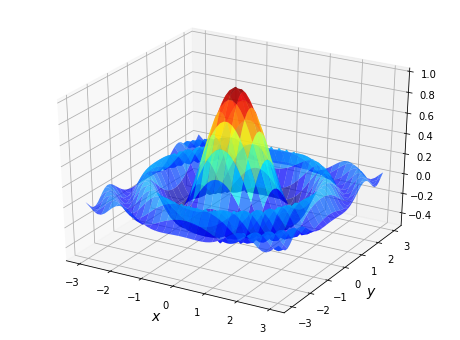

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)
xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
    y,
    f(x, y),
    rstride=2, cstride=2,
    cmap=cm.jet,
    alpha=0.7,
    linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
plt.show()

In [15]:
a=np.zeros(3)
a

array([0., 0., 0.])

In [16]:
z=np.zeros(10)

In [17]:
z.shape

(10,)

In [18]:
z.shape=(10,1)

In [19]:
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [20]:
z=np.zeros(4)
z.shape=(2,2,)
z

array([[0., 0.],
       [0., 0.]])

In [24]:
z=np.linspace(1,7,7)
z

array([1., 2., 3., 4., 5., 6., 7.])

In [25]:
z=np.identity(3)
z

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
z=np.array([10,20])
z

array([10, 20])

In [27]:
type(z)

numpy.ndarray

In [29]:
z=np.array([[1,2],[3,4]])
z

array([[1, 2],
       [3, 4]])

In [30]:
z[0,1]

2

In [31]:
z[0,:]

array([1, 2])

In [32]:
z[1,:]

array([3, 4])

In [33]:
z[:,1]

array([2, 4])

In [34]:
z=np.linspace(2,4,5)

In [36]:
indices=np.array((0,1,2))
z[indices]

array([2. , 2.5, 3. ])

In [40]:
d=np.array([0,1,1,0,1],dtype=bool)
d

array([False,  True,  True, False,  True])

In [41]:
z[d]

array([2.5, 3. , 4. ])

In [39]:
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [42]:
z=np.empty(3)

In [43]:
z

array([2.5, 3. , 4. ])

In [44]:
z[:]=1
z

array([1., 1., 1.])

In [2]:
import numpy as np
x=np.random.randn(4)
x

array([ 2.30552819, -0.0253213 ,  0.3024288 ,  0.57467413])

In [3]:
np.where(x>0,1,0)

array([1, 0, 1, 1])

In [5]:
z=np.linspace(0,7,3)

In [6]:
z>3

array([False,  True,  True])

In [7]:
def p(x,coef):
    X=np.ones_like(coef)
    X[1:]=x
    y=np.cumprod(X) # y = [1, x, x**2,...]
    return coef @ y

In [8]:
x=2
coef=np.linspace(2,4,3)
print(coef)
print(p(x,coef))

q=np.poly1d(np.flip(coef))
print(q(x))

[2. 3. 4.]
24.0
24.0


In [9]:
from numpy import cumsum
from numpy.random import uniform
class DiscreteRV:
    """
    Generates an array of draws from a discrete random variable with￿
    ↪vector of
    probabilities given by q.
    """
    
    def __init__(self,q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q=q
        self.Q=cumsum(q)
    
    def draw(self,k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0,1,size=k))
    

In [10]:
q=(0.1,0.9)
d=DiscreteRV(q)
d.q=(0.5,0.5)

In [14]:
class ECDF:
    def __init__(self,observations):
        self.observations=np.asarray(observations)
    
    def __call__(self,x):
        return np.mean(self.observations<=x)
    def plot(self,ax,a=None,b=None):
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()
        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        ax.plot(x_vals, f(x_vals))
        plt.show()
                            
                                

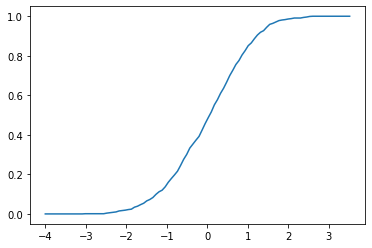

In [16]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
X=np.random.randn(1000)
F=ECDF(X)
F.plot(ax)

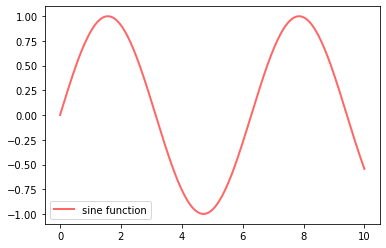

In [18]:
x = np.linspace(0, 10, 200)
y = np.sin(x)
fig,ax=plt.subplots()
ax.plot(x,y,'r-',linewidth=2,label='sine function',alpha=0.6)
ax.legend()# 图例
plt.show()

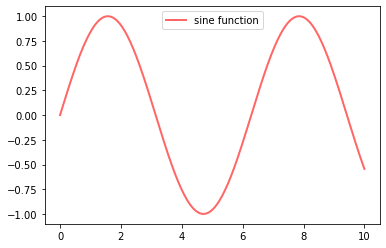

In [19]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')  
plt.show()